Reconocimiento de dígitos escritos a mano usando k-means
===

* *30 min* | Ultima modificación: Junio 25, 2019

## Definición del problema

En este ejemplo se tiene una muestra de dígitos escritos a mano por diferentes personas. Se desea construir un sistema de reconocimiento usando k-means. La información detallada está disponible en:

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits

## Solución

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

digits = load_digits()
data = scale(digits.data)

## Impresión de las imágenes

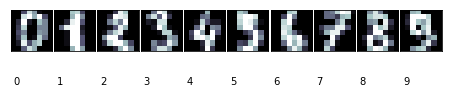

In [3]:
def print_digits(images,y,max_n=10):
    fig = plt.figure(figsize=(12, 12))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    i = 0
    while i < max_n and i < images.shape[0]:
        p = fig.add_subplot(20, 20, i + 1, xticks=[], yticks=[])
        p.imshow(images[i], cmap=plt.cm.bone)
        p.text(0, 14, str(y[i]))
        i = i + 1

print_digits(digits.images, digits.target, max_n=10)

## Particionamiento de los datos

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, images_train, images_test = train_test_split(
    data, digits.target, digits.images,  test_size=0.25,
    random_state=42)

n_samples, n_features = X_train.shape
n_digits = len(np.unique(y_train))
labels = y_train

## Entrenamiento del modelo

In [8]:
from sklearn.cluster import KMeans
clf = KMeans(init='k-means++', n_clusters=10, random_state=42)
clf.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

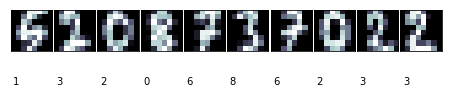

In [9]:
print_digits(images_train, clf.labels_, max_n=10)

## Pronóstico

In [10]:
y_pred=clf.predict(X_test)

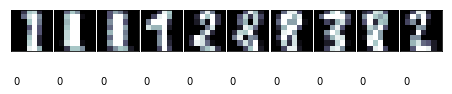

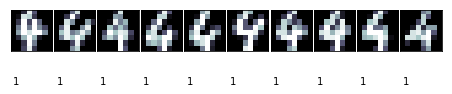

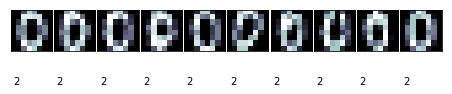

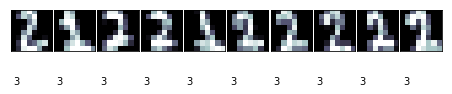

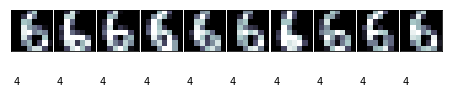

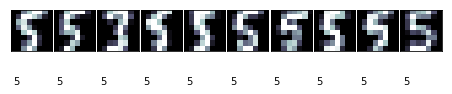

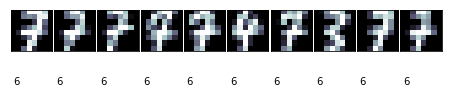

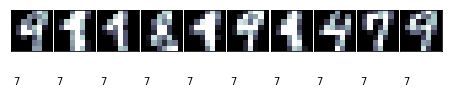

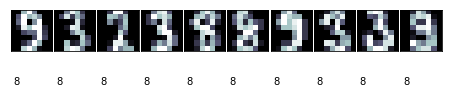

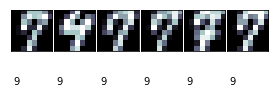

In [11]:
def print_cluster(images, y_pred, cluster_number):
    images = images[y_pred==cluster_number]
    y_pred = y_pred[y_pred==cluster_number]
    print_digits(images, y_pred,max_n=10)

for i in range(10):
    print_cluster(images_test, y_pred, i)

## Evaluación

In [12]:
from sklearn import metrics
print("Adjusted rand score: {:.2}".format(metrics.adjusted_rand_score(y_test, y_pred)))

Adjusted rand score: 0.57


In [13]:
metrics.confusion_matrix(y_test, y_pred)

array([[ 0,  0, 43,  0,  0,  0,  0,  0,  0,  0],
       [20,  0,  0,  7,  0,  0,  0, 10,  0,  0],
       [ 5,  0,  0, 31,  0,  0,  0,  1,  1,  0],
       [ 1,  0,  0,  1,  0,  1,  4,  0, 39,  0],
       [ 1, 50,  0,  0,  0,  0,  1,  2,  0,  1],
       [ 1,  0,  0,  0,  1, 41,  0,  0, 16,  0],
       [ 0,  0,  1,  0, 44,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1, 34,  1,  0,  5],
       [21,  0,  0,  0,  0,  3,  1,  2, 11,  0],
       [ 0,  0,  0,  0,  0,  2,  3,  3, 40,  0]])